# Group Project Proposal: 
# Analysis of the relationship between average age for committing homicide and geological location


## Introduction:

There has been an increase in the homicide rate in the U.S over the last couple of years, Ousey et al. suggest it is due to the increase in the immigration rate in the US, however, Fingerhut et al. (1998) suggest that there is a connection between homicide rate with age, race, sex and the level of urbanization. Our group has been interested in this topic and we found a dataset called ”Homicide Reports, 1980-2014“. This dataset includes murders from the FBI's Supplementary Homicide Report with more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, and ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and the weapon used.

The question that we are trying to answer is whether living in Los Angeles or New York would affect the average age for committing a homicide after 2000. We chose these 2 cities due to the fact that New York is the city with the most homicide in the eastern US and Los Angeles in the western US, and we thought that they are representative of each side. Our hypothesis is that there will be a difference in the age of committing homicide between New York and Los Angeles. We will compare the mean and median age of committing a homicide in these 2 cities and generate a confidence interval to see whether there will be a significant difference for us to make a conclusion.

## Preliminary Results:

### Loading library

In [1]:
library(cowplot)
library(datateachr)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



### Reading data(Because our data is from Kaggle, so instead of reading it from wet, we read it locally.)

In [2]:
data <- read.csv("data.csv")
head(data)

,X,Record.ID,Agency.Code,Agency.Name,Agency.Type,City,State,Year,Month,Incident,⋯,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count,Record.Source
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,1,402708,AR00400,Benton,Sheriff,Benton,Arkansas,2000,February,1,⋯,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
2,2,402712,AR00403,Siloam Springs,Municipal Police,Benton,Arkansas,2000,June,1,⋯,Hispanic,Male,21,White,Hispanic,Acquaintance,Knife,0,0,FBI
3,3,402713,AR00403,Siloam Springs,Municipal Police,Benton,Arkansas,2000,July,1,⋯,Hispanic,Male,24,Asian/Pacific Islander,Unknown,Wife,Handgun,0,0,FBI
4,4,402718,AR01400,Columbia,Sheriff,Columbia,Arkansas,2000,February,1,⋯,Not Hispanic,Male,16,White,Not Hispanic,Acquaintance,Blunt Object,0,1,FBI
5,5,402726,AR01801,West Memphis,Municipal Police,Crittenden,Arkansas,2000,January,1,⋯,Not Hispanic,Male,40,Black,Not Hispanic,Girlfriend,Firearm,0,0,FBI
6,6,402727,AR01801,West Memphis,Municipal Police,Crittenden,Arkansas,2000,January,2,⋯,Not Hispanic,Male,39,Black,Not Hispanic,Wife,Firearm,0,0,FBI


In [3]:
str(data)

'data.frame':	84253 obs. of  25 variables:
 $ X                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Record.ID            : int  402708 402712 402713 402718 402726 402727 402752 402754 402755 402765 ...
 $ Agency.Code          : chr  "AR00400" "AR00403" "AR00403" "AR01400" ...
 $ Agency.Name          : chr  "Benton" "Siloam Springs" "Siloam Springs" "Columbia" ...
 $ Agency.Type          : chr  "Sheriff" "Municipal Police" "Municipal Police" "Sheriff" ...
 $ City                 : chr  "Benton" "Benton" "Benton" "Columbia" ...
 $ State                : chr  "Arkansas" "Arkansas" "Arkansas" "Arkansas" ...
 $ Year                 : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ Month                : chr  "February" "June" "July" "February" ...
 $ Incident             : int  1 1 1 1 1 2 1 3 1 1 ...
 $ Crime.Type           : chr  "Murder or Manslaughter" "Murder or Manslaughter" "Murder or Manslaughter" "Murder or Manslaughter" ...
 $ Crime.Solved         : chr  "No" "Yes"

### Wrangling data

In [17]:
clean_data <- data %>%
    filter(!is.na(Victim.Age),!is.na(Perpetrator.Age), Victim.Age != 0, Perpetrator.Age != 0, Victim.Age < 100) %>%
    select(-Record.ID:-Agency.Type, -State, -Incident, -Crime.Type, -Crime.Solved, -Victim.Sex, -Victim.Race:-Perpetrator.Sex, 
           -Perpetrator.Race:-Relationship, -Victim.Count:-Record.Source, -X)
LA_data <- clean_data %>%
    filter(City == "Los Angeles") %>%
    select(-City)
NY_data <- clean_data %>%
    filter(City == "New York") %>%
    select(-City)
head(LA_data)
print("Los Angeles data population: ")
nrow(LA_data)
head(NY_data)
print("New York data population: ")
nrow(NY_data)

,Year,Month,Victim.Age,Perpetrator.Age,Weapon
,<int>,<chr>,<int>,<int>,<chr>
1,2000,January,17,21,Handgun
2,2000,January,26,52,Handgun
3,2000,January,46,47,Blunt Object
4,2000,February,50,33,Handgun
5,2000,February,17,20,Handgun
6,2000,February,70,34,Handgun


[1] "Los Angeles data population: "


[1] 6100

,Year,Month,Victim.Age,Perpetrator.Age,Weapon
,<int>,<chr>,<int>,<int>,<chr>
1,2007,December,29,31,Firearm
2,2007,January,16,21,Firearm
3,2007,January,28,33,Knife
4,2007,January,20,30,Firearm
5,2007,February,36,42,Blunt Object
6,2007,February,25,43,Firearm


[1] "New York data population: "


[1] 1282

### Ploting data

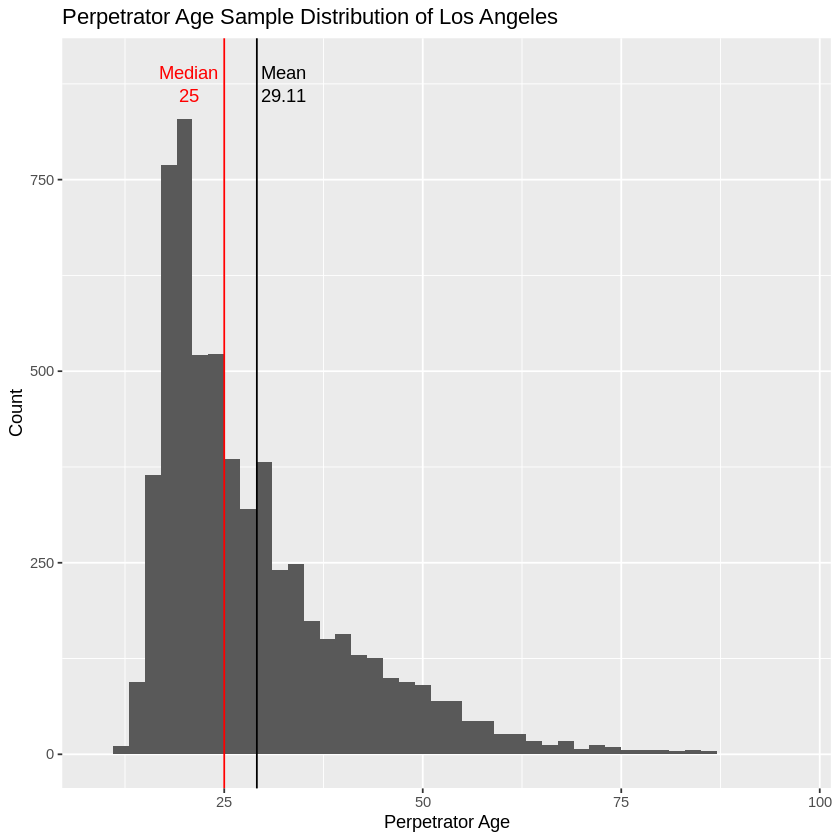

In [5]:
LA_p_age_mean <- LA_data %>%
    summarize(mean = mean(Perpetrator.Age)) %>%
    pull()
LA_p_age_median <- LA_data %>%
    summarize(median = median(Perpetrator.Age)) %>%
    pull()
LA_p_age_sample_dist <- LA_data %>%
    ggplot(aes(x = Perpetrator.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = LA_p_age_mean) +
    annotate("text", x = 32.5, y = 890, label = "Mean") +
    annotate("text", x = 32.5, y = 860, label = round(LA_p_age_mean, 2)) +
    geom_vline(xintercept = LA_p_age_median, color = "red") +
    annotate("text", x = 20.5, y = 890, label = "Median", color = "red") +
    annotate("text", x = 20.5, y = 860, label = round(LA_p_age_median, 2), color = "red") +
    labs(x = "Perpetrator Age", title = "Perpetrator Age Sample Distribution of Los Angeles", y = "Count")
LA_p_age_sample_dist

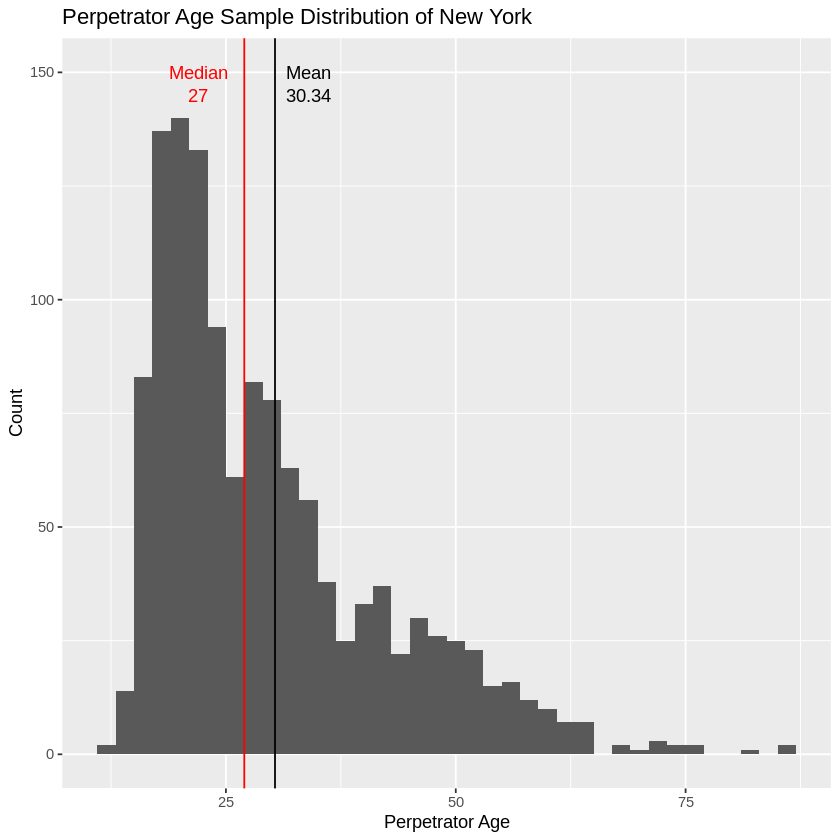

In [6]:
NY_p_age_mean <- NY_data %>%
    summarize(mean = mean(Perpetrator.Age)) %>%
    pull()
NY_p_age_median <- NY_data %>%
    summarize(median = median(Perpetrator.Age)) %>%
    pull()
NY_p_age_sample_dist <- NY_data %>%
    ggplot(aes(x = Perpetrator.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = NY_p_age_mean) +
    annotate("text", x = 34, y = 150, label = "Mean") +
    annotate("text", x = 34, y = 145, label = round(NY_p_age_mean, 2)) +
    geom_vline(xintercept = NY_p_age_median, color = "red") +
    annotate("text", x = 22, y = 150, label = "Median", color = "red") +
    annotate("text", x = 22, y = 145, label = round(NY_p_age_median, 2), color = "red") +
    labs(x = "Perpetrator Age", title = "Perpetrator Age Sample Distribution of New York", y = "Count")
NY_p_age_sample_dist

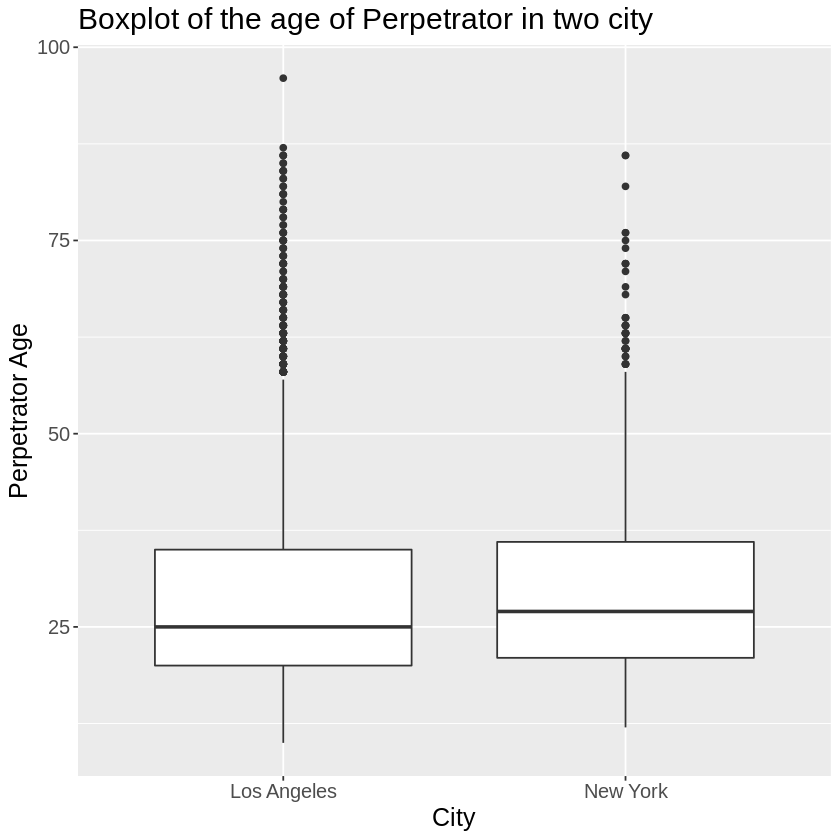

In [19]:
boxplots <- 
   clean_data %>%  
    filter(City %in% c("New York", "Los Angeles")) %>%
   ggplot(aes(x = City, y = Perpetrator.Age)) + 
   geom_boxplot() + 
   ylab("Perpetrator Age") +
   xlab("City") +
   ggtitle("Boxplot of the age of Perpetrator in two city") +
   theme(text = element_text(size=15))
boxplots

## Methods:

In the previous part, we gave a visualization of the age of homicide in 2 different cities. However, we do not have the confidence interval of our estimates and we did not include the year factor.

## Plan:

We want to compare the average age of murder in Los Angeles and New York in different periods.

Repeatedly doing bootstrap sampling on the original sample.

Generate a confidence interval for the average homicide age.

Test our null hypothesis that the ages are the same for committing homicide in the 2 cities.

From the histogram, we can see that Los Angeles has a slightly lower median and means compared to New York. From the boxplot, we can see the  IQR, median, and tails are similar in the two plots, but the outliers of LA have a larger range than that of NY. Therefore, we would expect that the average age for committing a homicide in Los Angeles has little difference from that of New York. If that is the case, we cannot conclude that there is a direct correlation between the age of the murder and the location. On the other hand, if our expectation is proven wrong through hypothesis testing, we can pose further questions about if the culture and laws in these two cities affect our results.

The low average age for homicides in both these cities poses questions regarding what we can do to help mitigate these murders. This analysis could potentially inform us on which ages we should focus on helping reduce overall homicide rates.

## References:

Dataset: https://www.kaggle.com/datasets/murderaccountability/homicide-reports

Ousey, G. C., & Kubrin, C. E. (2014). Immigration and the changing nature of homicide in US cities, 1980-2010. Journal of Quantitative Criminology, 30(3), 453-483. doi:https://doi.org/10.1007/s10940-013-9210-5

Fingerhut LA, Ingram DD, Feldman JJ. Homicide Rates Among US Teenagers and Young Adults(1998): Differences by Mechanism, Level of Urbanization, Race, and Sex,1987 Through 1995. JAMA. 1998;280(5):423–427.     doi:10.1001/jama.280.5.423 
